# Introduction


Cobify is a company dedicated to people transport just like Uber, Lyft or even Cabify (who clearly stole our name).

Cobify was founded in 1992 coinciding with the Olympic Games hosted in Barcelona. Our company has always been known by:

Not having permits to drive people (we do know how to drive)
Using tricked-out high-end car
In our home town, Barcelona, VTC licenses have appeared and we have been able to start being a legal company, because we do have licenses now. However, we still keep using tricked-out high-end cars.

We are an old school company and data analysis falls far beyond our reach, and as we do not want to be on the news we want to know how you can help our business.

A bit of history of the gas problem ⛽️
Tricked-out cars use gas with a high cetane index, like unleaded 98 petrol in order to avoid delay/advancing in combustible injection (avoiding connecting rod pitting ), but we have started to embrace petrols that add ethanol in their formula, as they are cheaper and they use the same cetane index as more expensive petrol. Without going into further detail (we could write an actual book about this) we think that going green and being modern can be very expensive, as we have seen that cars use more petrol than they used to for each trip.

Your challenge starts here 📈
Now it is your turn: can you help us find the best combustible? We have saved some consumption data in a .csv, but… it would be very nice if you could add some more data. You can find data in the repo :-)

Show us your abilities and make yourself worth the amount of money you'd like to get paid. You have 3 hours to turn the challenge in starting right now! 💸

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('data/measurements.csv')

In [3]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [7]:
data.shape

(388, 12)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [11]:
data.isnull().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [12]:
data['distance'] = data['distance'].str.replace(',', '.').astype(float)
data['consume'] = data['consume'].str.replace(',', '.').astype(float)
data['temp_inside'] = data['temp_inside'].str.replace(',', '.').astype(float)
data['refill liters'] = data['refill liters'].str.replace(',', '.').astype(float)



In [13]:
data = data.drop(columns=['specials', 'refill liters', 'refill gas'])

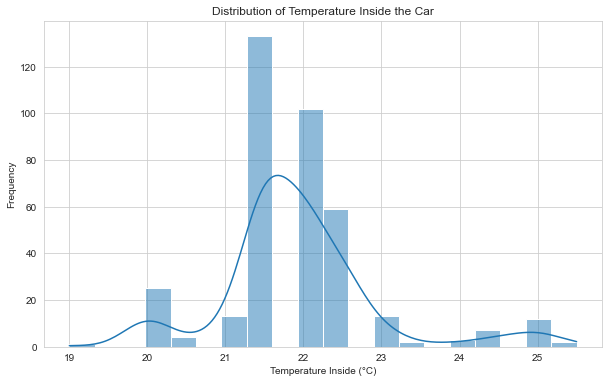

In [17]:

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data['temp_inside'].dropna(), kde=True, bins=20)
plt.title('Distribution of Temperature Inside the Car')
plt.xlabel('Temperature Inside (°C)')
plt.ylabel('Frequency')
plt.show()

In [19]:
median_temp_inside = data['temp_inside'].median()
data['temp_inside'].fillna(median_temp_inside, inplace=True)

In [21]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0


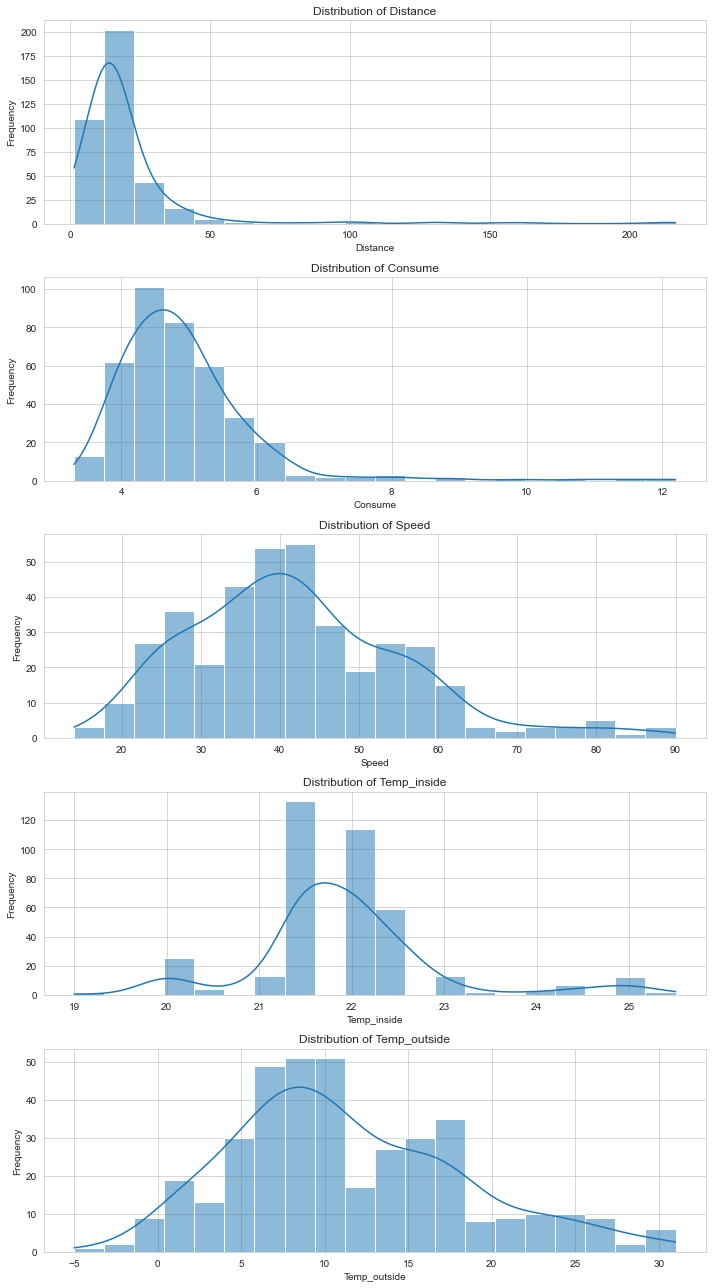

In [23]:
numeric_columns = ['distance', 'consume', 'speed', 'temp_inside', 'temp_outside']

fig, axes = plt.subplots(len(numeric_columns), 1, figsize=(10, 18))

for i, col in enumerate(numeric_columns):
    sns.histplot(data[col], ax=axes[i], kde=True, bins=20)
    axes[i].set_title(f'Distribution of {col.capitalize()}')
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [24]:
data['gas_type'].value_counts()

SP98    228
E10     160
Name: gas_type, dtype: int64

In [27]:
# Define the prices for E10 and SP98 in euros
price_per_liter = {
    'E10': 1.38,
    'SP98': 1.46
}

# Calculate efficiency as distance/consume for each entry
data['efficiency'] = data['distance'] / data['consume']

# Calculate the cost per kilometer for each trip
data['cost_per_km'] = data.apply(lambda row: row['consume'] * price_per_liter[row['gas_type']] / row['distance'], axis=1)

# Separate the data based on the type of gas for later analysis
data_e10 = data[data['gas_type'] == 'E10']
data_sp98 = data[data['gas_type'] == 'SP98']

# Calculate descriptive statistics for the cost per kilometer for each type of gas
stats_e10 = data_e10['cost_per_km'].describe()
stats_sp98 = data_sp98['cost_per_km'].describe()



In [32]:
data

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,efficiency,cost_per_km
0,28.0,5.0,26,21.5,12,E10,0,0,0,5.600000,0.246429
1,12.0,4.2,30,21.5,13,E10,0,0,0,2.857143,0.483000
2,11.2,5.5,38,21.5,15,E10,0,0,0,2.036364,0.677679
3,12.9,3.9,36,21.5,14,E10,0,0,0,3.307692,0.417209
4,18.5,4.5,46,21.5,15,E10,0,0,0,4.111111,0.335676
...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0,4.324324,0.337625
384,16.1,4.3,38,25.0,31,SP98,1,0,0,3.744186,0.389938
385,16.0,3.8,45,25.0,19,SP98,0,0,0,4.210526,0.346750
386,15.4,4.6,42,25.0,31,SP98,1,0,0,3.347826,0.436104


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flex

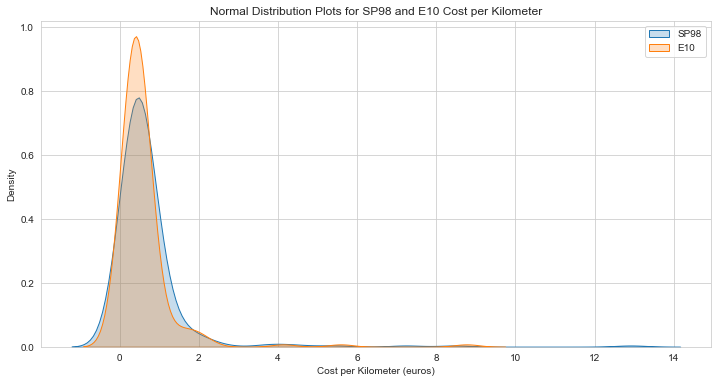

In [30]:
# Plot normal distribution plots for the cost per kilometer of SP98 and E10

plt.figure(figsize=(12, 6))

# Plot for SP98
sns.distplot(data_sp98['cost_per_km'], hist=False, label='SP98', kde_kws={'shade': True})

# Plot for E10
sns.distplot(data_e10['cost_per_km'], hist=False, label='E10', kde_kws={'shade': True})

plt.title('Normal Distribution Plots for SP98 and E10 Cost per Kilometer')
plt.xlabel('Cost per Kilometer (euros)')
plt.ylabel('Density')
plt.legend()
plt.show()

In [26]:
stats_e10

count    160.000000
mean       0.601757
std        0.897877
min        0.048718
25%        0.300640
50%        0.428815
75%        0.579473
max        8.767059
Name: cost_per_km, dtype: float64

In [28]:
stats_sp98

count    228.000000
mean       0.738958
std        1.233623
min        0.031829
25%        0.346750
50%        0.493691
75%        0.635806
max       12.915385
Name: cost_per_km, dtype: float64

In [29]:
from scipy import stats

# Perform Levene's test to check the equality of variances between the two distributions
levene_test = stats.levene(data_e10['cost_per_km'], data_sp98['cost_per_km'])

# Perform a two-sample t-test to compare the means
# Since the distributions are not normal, we'll use Welch's t-test, which does not assume equal population variance
t_test = stats.ttest_ind(data_e10['cost_per_km'], data_sp98['cost_per_km'], equal_var=False)

levene_test, t_test


(LeveneResult(statistic=0.5816289698088927, pvalue=0.4461403174126639),
 Ttest_indResult(statistic=-1.2677054176580544, pvalue=0.20566839386287497))

### Levene's Test for Equality of Variances:

- Statistic: 0.5816
- p-value: 0.4461

Levene's test p-value is greater than 0.05, which suggests that we fail to reject the null hypothesis of equal variances between the two groups. This means that the variance in cost per kilometer for E10 and SP98 is not significantly different.

### Welch's t-test for Equality of Means:

- Statistic: -1.2677
- p-value: 0.2057

Welch's t-test, which does not assume equal variances, gives a p-value greater than 0.05. This indicates that there is not a statistically significant difference in the mean cost per kilometer between E10 and SP98 at the conventional 0.05 alpha level.

In summary, based on the data provided and these statistical tests, we do not have sufficient evidence to conclude that there is a significant difference in the cost-effectiveness between E10 and SP98 fuels for the cars in the dataset.​

# Conclusion

For Cobify's business case, here is the conclusion based on the analysis:

**1. Cost per Kilometer:**

The mean cost per kilometer was found to be lower for E10 than for SP98. This would suggest that E10 may be more cost-effective on a per kilometer basis.
Statistical Significance:

Despite the lower mean cost per kilometer for E10, the Welch's t-test did not find a statistically significant difference between the costs per kilometer of E10 and SP98. This means that, based on the available data, we cannot confidently state that the difference in costs is due to the type of fuel rather than random variation.
Variability in Fuel Efficiency:

The test for equal variances showed no significant difference in the variability of costs between the two fuel types.


**2. Business Decision:**

Given that E10 is cheaper per liter and the lack of statistical evidence of its cost per kilometer being significantly higher than SP98, Cobify may consider continuing the use of E10 to reduce costs without significantly impacting fuel efficiency.

However, the decision should also factor in other aspects such as engine performance, maintenance costs, and the potential long-term impacts of using E10 versus SP98, which were not part of this analysis.
Further Considerations:

The presence of outliers and the skewed distributions indicate that there may be other factors influencing fuel efficiency that are not captured in the dataset. It would be beneficial for Cobify to investigate further what causes these outliers, such as specific driving conditions, car models, or driver behaviors.

Additional data and a more comprehensive analysis could provide a clearer picture of the cost-effectiveness of the two types of fuel. This might include collecting data over a longer period, across different seasons, and including a wider variety of driving patterns and conditions.

**3. Environmental Impact:**

If Cobify is also considering the environmental impact as part of its decision, E10, being a blend that includes ethanol, typically produces fewer emissions compared to pure gasoline like SP98. This could help Cobify align with environmentally friendly practices and improve its public image, which might be beneficial for the business in the long term.

In conclusion, while the statistical analysis does not show a significant difference in fuel costs between E10 and SP98, the lower price of E10 and its environmental benefits make it a reasonable choice for Cobify, provided it does not negatively impact vehicle performance or maintenance.